참고자료: http://cs231n.stanford.edu/
<img src='cnn.png'>
- stride: filter를 몇 칸씩 움직일 것인지
- output size = (size of image - size of filter) / stride + 1
- stride를 크게 할 수록 유실하는 정보가 많아진다. 
=> Padding이라는 개념을 사용

#### Padding: 가장자리에 0 pad를 두는 것. 그림이 급격하게 작아지는 것을 방지하고, 그 부분이 모서리임을 네트워크에 알릴 수 있다.

#### In general, common to see CONV layers with stride 1, filters of size F * F, and zero-padding with (F-1)/2  (will preserve size spatially)

#### How many weight variables?
하나의 convolution layer가 6개의 (5*5*3) filter로 이루어져 있다면,
6(model 갯수) * (5 * 5 * 3)

#### How to set them?
처음에는 random하게 하고, 이를 학습시킨다.

# CNN introduction: Max pooling and others

### pooling layer (= sampling)
- conv layer에서 각각의 layer를 뽑아서 sampling을 통해 resize한 후 이를 다시 쌓는다 

#### Max pooling
- 각 filter에서 가장 큰 값만 뽑는다 (결과의 size는 filter와 stride에 따라 달라진다)

#### Fully Connected Layer (FC layer)
- 최종적으로 나온 layer를 FC에 넣고 분류를 한다.


참고:
https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

# CNN case study
1. LeNet-5

2. AlexNet

3. GoogLeNet

4. ResNet

5. Convolutional Neural Networks for Sentence Classification

6. DeepMind's AlphaGo

# Lab 11-1. CNN Basics

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sess = tf.Session()

(1, 3, 3, 1)


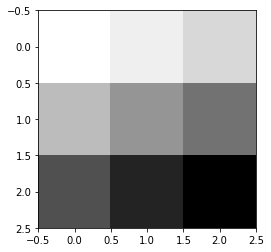

In [3]:
#Create Toy image
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype = np.float32)

print(image.shape) #처음 1: 1개의 이미지. 
plt.imshow(image.reshape(3,3), cmap = 'Greys')

Image: 1,3,3,1 image  |   Filter: 2,2,1,1 |  stride: 1,1  | padding: Valid

In [6]:
weight = tf.constant([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print('weight.shape:', weight.shape)

weight.shape: (2, 2, 1, 1)


In [10]:
#padding이 same: 원래 이미지와 똑같은 사이즈가 되도록 해준다.
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'VALID')
conv2d_img = conv2d.eval(session = sess)
print('conv2d_img.shape', conv2d_img.shape)

conv2d_img.shape (1, 2, 2, 1)


[[12. 16.]
 [24. 28.]]


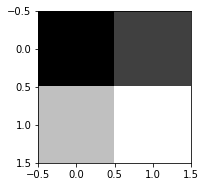

In [12]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap = 'gray')

image.shpae (1, 3, 3, 1)
conv2d_img.shape (1, 3, 3, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


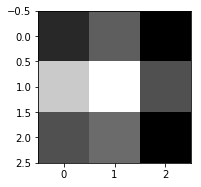

In [14]:
# padding = same
print('image.shpae', image.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding ='SAME')
conv2d_img = conv2d.eval(session = sess)
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3,3), cmap = 'gray')

### 3 filters (2, 2, 1, 3)

image.shpae (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


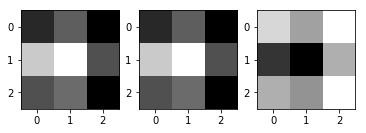

In [17]:
print('image.shpae',image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1]]]])

print('weight.shape',weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1,1], padding ='SAME')
conv2d_img = conv2d.eval(session = sess)
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap = 'gray')

## Max Pooling

In [19]:
image = np.array([[[[4],[3]],
                  [[2],[1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1, 2, 2, 1],
                     strides = [1, 1, 1, 1], padding = 'SAME')

print(pool.shape)
print(pool.eval(session = sess))

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## MNIST Image

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


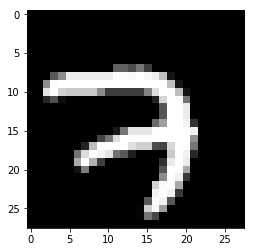

In [23]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap = 'gray')

### MNIST Convolution layer

Tensor("Conv2D_9:0", shape=(1, 14, 14, 5), dtype=float32)


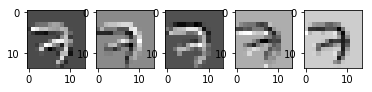

In [27]:
img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev = 0.01))
conv2d = tf.nn.conv2d(img, W1, strides = [1,2,2,1], padding = 'SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval(session = sess)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i , one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14,14), cmap = 'gray')

## MNIST Max pooling

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


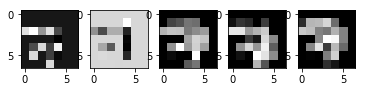

In [28]:
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1], strides = [1,2,2,1],
                     padding = 'SAME')
print(pool)

sess.run(tf.global_variables_initializer())
pool_img = pool.eval(session = sess)
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7,7), cmap = 'gray')

# Lab 11-2. CNN MNIST: 99%!

### Conv layer 1

In [35]:
tf.reset_default_graph() 

In [36]:
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])  #img 28*28*1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

In [37]:
#L! ImgIn shape = (?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))

#Conv -> (?, 28, 28, 32)
#Pool -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

### Conv layer 2

In [38]:
#L2 ImgIn shape = (?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))

#Conv -> (?, 14, 14, 64)
#Pool -> (?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L2 = tf.reshape(L2, [-1, 7*7*64]) #이미지 2D로 펼치기

### Fully Connected (FC, Dense) layer

In [39]:
#Final FC  7*7*64 inputs => 10 outputs
W3 = tf.get_variable('W3', shape = [7*7*64,10],
                    initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b

In [40]:
#define cost/loss & optimizer
learning_rate = 0.01

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis,
                                                             labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [41]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [42]:
#train my model
training_epochs = 15
batch_size = 100

print('Learning started. It takes sometime')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

Learning started. It takes sometime
Epoch:  0001 cost =  0.154488636
Epoch:  0002 cost =  0.051587629
Epoch:  0003 cost =  0.040927011
Epoch:  0004 cost =  0.035382876
Epoch:  0005 cost =  0.029429423
Epoch:  0006 cost =  0.023238436
Epoch:  0007 cost =  0.025244579
Epoch:  0008 cost =  0.023215868
Epoch:  0009 cost =  0.018693899
Epoch:  0010 cost =  0.018209718
Epoch:  0011 cost =  0.017019076
Epoch:  0012 cost =  0.024039190
Epoch:  0013 cost =  0.016098871
Epoch:  0014 cost =  0.016651566
Epoch:  0015 cost =  0.018577722
Learning Finished!


In [43]:
#Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy: ', sess.run(accuracy, feed_dict = {
    X:mnist.test.images, Y: mnist.test.labels
}))

Accuracy:  0.987


## Deep CNN
- Convolutional layer를 3개로, FC도 2개로 늘림

In [66]:
tf.reset_default_graph() 

In [67]:
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])  #img 28*28*1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

#L! ImgIn shape = (?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))

#Conv -> (?, 28, 28, 32)
#Pool -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

#L2 ImgIn shape = (?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))

#Conv -> (?, 14, 14, 64)
#Pool -> (?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

#L! ImgIn shape = (?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev = 0.01))

#Conv -> (?, 7,7,128)
#Pool -> (?, 4, 4, 128)
#Reshape -> (?, 4*4*128)  
L3 = tf.nn.conv2d(L2, W3, strides = [1,1,1,1], padding = 'SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L3= tf.nn.dropout(L3, keep_prob = keep_prob)
L3 = tf.reshape(L3, [-1, 128*4*4])

In [68]:
W4 = tf.get_variable('W4', shape = [4*4*128,625],
                    initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

W5 = tf.get_variable('W5', shape = [625, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [73]:
#define cost/loss & optimizer
learning_rate = 0.001

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis,
                                                             labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

#train my model
training_epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

Learning started. It takes sometime
Epoch:  0001 cost =  0.456314139
Epoch:  0002 cost =  0.091830331
Epoch:  0003 cost =  0.067834376
Epoch:  0004 cost =  0.055874228
Epoch:  0005 cost =  0.049280604
Epoch:  0006 cost =  0.043108482
Epoch:  0007 cost =  0.039385268
Epoch:  0008 cost =  0.036413365
Epoch:  0009 cost =  0.033534930
Epoch:  0010 cost =  0.031464826
Epoch:  0011 cost =  0.029129510
Epoch:  0012 cost =  0.028491002
Epoch:  0013 cost =  0.027030902
Epoch:  0014 cost =  0.026208984
Epoch:  0015 cost =  0.024493023
Learning Finished!


In [74]:
#Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy: ', sess.run(accuracy, feed_dict = {
    X:mnist.test.images, Y: mnist.test.labels, keep_prob : 1
}))

Accuracy:  0.9936


## Lab 11-3. Class, Layers, Ensemble

### python class로 코드를 간결하게!

In [77]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [80]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()
    
    def _build_net(self):   #n = 5
        with tf.variable_scope(self.name):
            #input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])
            #img 28*28*1 (black/white)
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])
            self.keep_prob = tf.placeholder(tf.float32)
            
            #L1 ImgIn shape = (?, 28, 28, 1)
            W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))
            #    Conv     -> (?, 28, 28, 32)
            #    Pool     -> (?, 14, 14, 32)
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)

            # L2 ImgIn shape=(?, 14, 14, 32)
            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            #    Conv      ->(?, 14, 14, 64)
            #    Pool      ->(?, 7, 7, 64)
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)

            # L3 ImgIn shape=(?, 7, 7, 64)
            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            #    Conv      ->(?, 7, 7, 128)
            #    Pool      ->(?, 4, 4, 128)
            #    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                                1, 2, 2, 1], padding='SAME')
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)

            L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

            # L4 FC 4x4x128 inputs -> 625 outputs
            W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)

            # L5 Final FC 625 inputs -> 10 outputs
            W5 = tf.get_variable("W5", shape=[625, 10],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5) + b5

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prop=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.keep_prob: keep_prop})

    def get_accuracy(self, x_test, y_test, keep_prop=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})

    def train(self, x_data, y_data, keep_prop=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})
    

In [83]:
tf.reset_default_graph() 
sess = tf.Session()
m1 = Model(sess, 'm1')

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch
    
    print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

print('Accuracy: ', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Learning Started!
Epoch:  0001 cost =  0.342604766
Epoch:  0002 cost =  0.093536929
Epoch:  0003 cost =  0.070469471
Epoch:  0004 cost =  0.058738773
Epoch:  0005 cost =  0.049786922
Epoch:  0006 cost =  0.044850997
Epoch:  0007 cost =  0.041008575
Epoch:  0008 cost =  0.036887206
Epoch:  0009 cost =  0.035271136
Epoch:  0010 cost =  0.032515103
Epoch:  0011 cost =  0.031685277
Epoch:  0012 cost =  0.028715743
Epoch:  0013 cost =  0.026338087
Epoch:  0014 cost =  0.025942665
Epoch:  0015 cost =  0.025331005
Learning Finished!
Accuracy:  0.9921


### tf.layers

In [ ]:
conv1 = tf.layers.conv2d(inputs = X_img, filter = 32, kernel_size = [3,3],
                        padding = 'SAME', activation = tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs = conv1, pool_size = [2,2], 
                               padding = 'SAME', strides = 2)
dropout1 = tf.layers.dropout(inputs = pool1, rate = 0.7, training = self.training)

#FC  _ ㄱㅖ산을 줄여 준다
flat = tf.reshape(dropout3, [-1, 128*4*4])
dense = tf.layer.dense(inputs = flat, units = 625, activation = tf.nn.relu)

# Ensemble

In [84]:
models = []  #model 담을 공간
num_models = 7  #model 7개 사용
for m in range(num_models):
    models.append(Model(sess, 'model' + str(m)))  #7개 모델 Class로 구현
    
sess.run(tf.global_variables_initializer())
print('Learning Started!')

#train my model
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))  #7개 모델의 각각 cost 담을 공간
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        #train each model
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch
            
    print('Epoch: ', '%04d' %(epoch+1), 'cost =', avg_cost_list)
print('Learning Finished!')

Learning Started!
Epoch:  0001 cost = [0.41164619 0.40230644 0.35088645 0.44660903 0.38310558 0.32672985
 0.41158027]
Epoch:  0002 cost = [0.10377992 0.10036789 0.09636479 0.09407296 0.09359941 0.09857629
 0.09653408]
Epoch:  0003 cost = [0.07223498 0.07107106 0.07297402 0.06986446 0.07008617 0.07139572
 0.07224902]
Epoch:  0004 cost = [0.06249234 0.05826437 0.05765523 0.05765966 0.05681408 0.05981019
 0.05888418]
Epoch:  0005 cost = [0.05208399 0.05244706 0.05378113 0.05137817 0.05082138 0.05133672
 0.0516823 ]
Epoch:  0006 cost = [0.04620921 0.04596436 0.0450408  0.04679072 0.04634324 0.04768562
 0.04733467]
Epoch:  0007 cost = [0.04319195 0.04127278 0.04249375 0.0399895  0.0418713  0.04211795
 0.04172419]
Epoch:  0008 cost = [0.04022635 0.03823267 0.03924942 0.03897571 0.03709504 0.03958222
 0.03916604]
Epoch:  0009 cost = [0.03813802 0.0349248  0.03434246 0.03755904 0.0350264  0.03710474
 0.03702305]
Epoch:  0010 cost = [0.0352195  0.03342309 0.03316542 0.03255695 0.03348103 0.0352

각각의 모델의 accuracy보다 앙상블의 accuracy가 더 높다. 

In [89]:
#Test model and check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros(test_size *10).reshape(test_size, 10)  #row는 각 data, column은 T/F

for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy: ', m.get_accuracy(mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p #각 모델의 각 data에 대한 예측을 모두 합하기
    
ensemble_correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(tf.cast(ensemble_correct_prediction, tf.float32))

print('Ensemble accuracy: ', sess.run(ensemble_accuracy))

0 Accuracy:  0.9933
1 Accuracy:  0.9933
2 Accuracy:  0.9943
3 Accuracy:  0.9943
4 Accuracy:  0.9941
5 Accuracy:  0.9931
6 Accuracy:  0.9931
Ensemble accuracy:  0.9955
